# Seaborn
* Seaborn is a statistical plotting library (built on top of matplotlib)
* Seaborn has beautiful default styles
* Sebaorn is also designed to work really well with Pandas dataframes

In [1]:
import seaborn as sns
%matplotlib inline

### Distribution Plots

Visualize the distribution of univariate data.

In [2]:
# Example: Tips
# Load the dataset and check it out
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


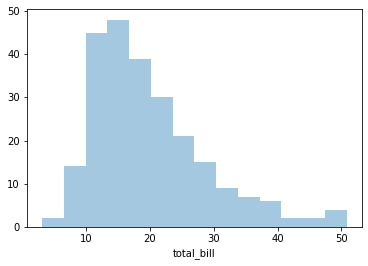

In [3]:
# Visualize the distribution of the total bill
sns.distplot(tips['total_bill'],kde=False) # Create a distribution plot of the data (and remove the kernel density estimate)

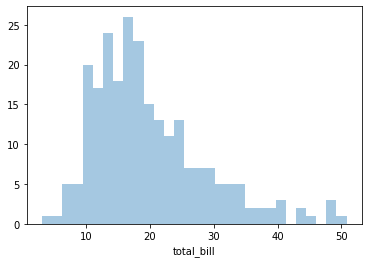

In [4]:
# Get more definition in the distribution 
sns.distplot(tips['total_bill'],kde=False,bins=30) # Change the number of bins in the histogram 

### Joint Plots
Visualize the distribution of bivariate data.

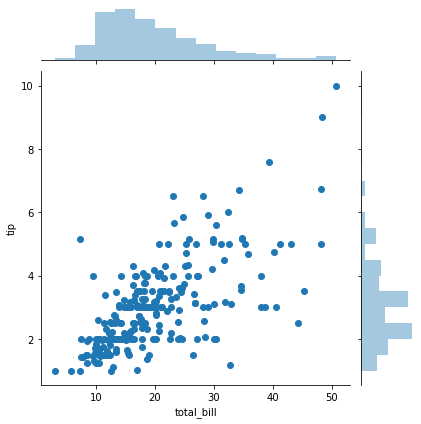

In [5]:
# Visualize how the total bill and tip size vary with respect to each other
sns.jointplot(x='total_bill',y='tip',data=tips) # Create a joint plot with total bill and tips as the params

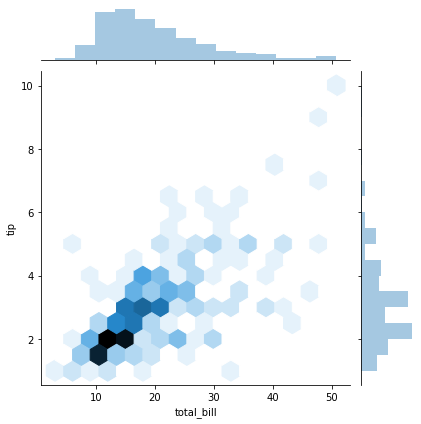

In [6]:
# You can change the kind of joint plot
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex') # Hexagon representation 

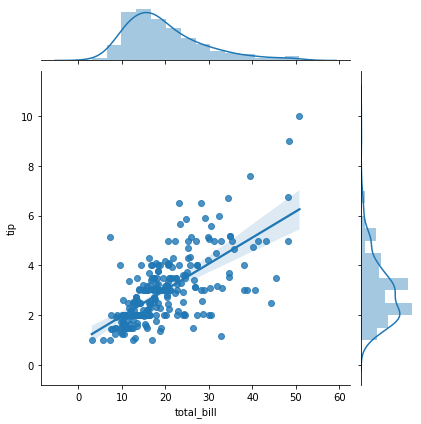

In [7]:
# More kinds of joint plots
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg') # Regression 

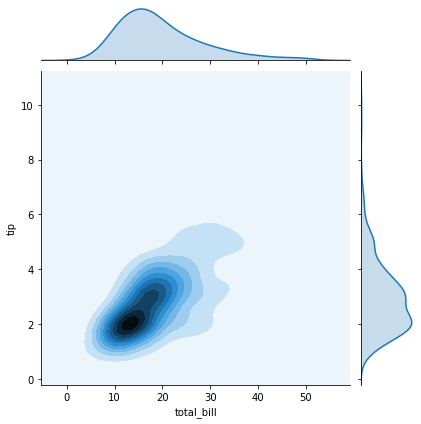

In [8]:
# More kinds of joint plots
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde') # KDE (shows the density of where the data points are located)

### Pairplot

Pairplots plot pairwise relationships across the numerical columns of an entire dataframe (and supports a color hue argument fo categorical columns).

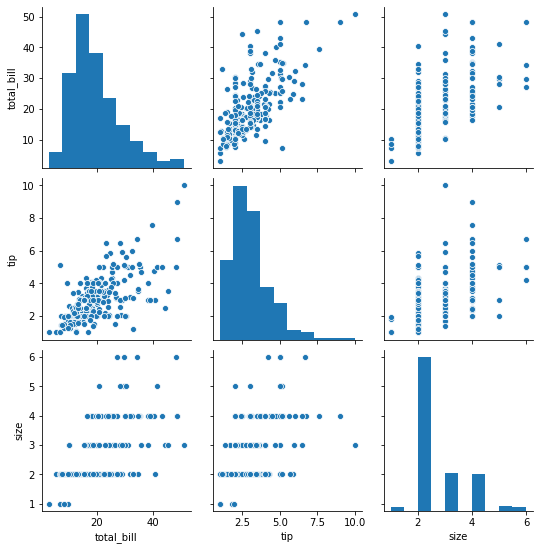

In [9]:
# Create a pairplot for the tips dataframe
sns.pairplot(tips) # Creates scatterplots for each pair (and histogram when column compared to itself)

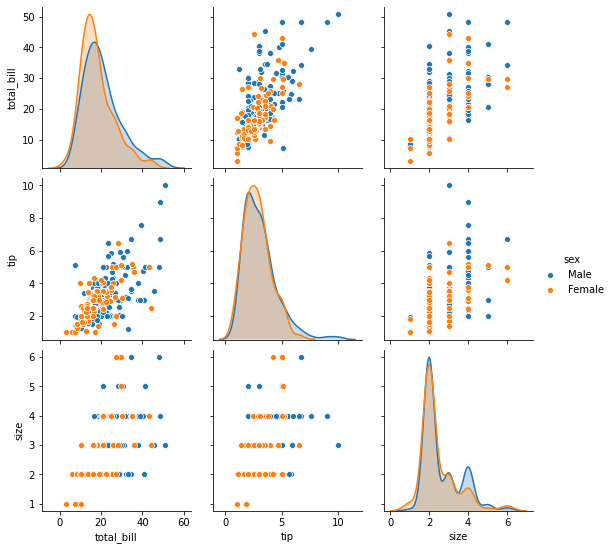

In [10]:
# Add a hue to visualize categorical data
sns.pairplot(tips,hue='sex') # See how sex varies with other variables 

### Rugplot

Draws a dash on the x axis for every data point that appears on a univariate scale (shows where most points are located).

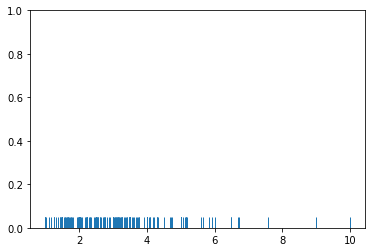

In [11]:
# Make a rug plot for the tip size
sns.rugplot(tips['tip']) # Most tips between 1 and 4 dollars

### KDE (Kernal Density Estimation) Plots

The KDE plot is constructed by summing the normal Gaussian distributions centered around every data point (as on a rugplot). 

(0.0, 1.0)

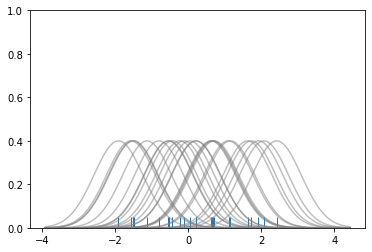

In [12]:
# Example: Step 1 - Create normal Gaussian distributions for every data point

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)
# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2
# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Create a rugplot
sns.rugplot(dataset)

# Set up the bandwidth
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

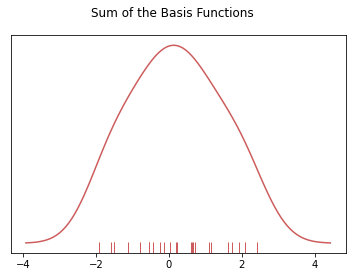

In [13]:
# Example: Step 2 - Sum the normal Gaussian distributions to get the kde plot

# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

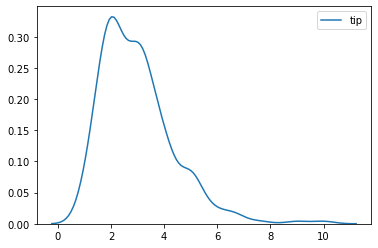

In [14]:
# If you don't want the bars from the rug plot, you can create just a kde plot 
sns.kdeplot(tips['tip'])

### Categorical Plots

In [1]:
import seaborn as sns 
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Barplots

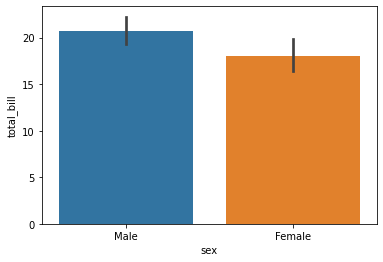

In [2]:
# Create a bar plot with a categorical variable on the x axis and numeric on the y axis
sns.barplot(x='sex',y='total_bill',data=tips) # Get the average  total bill for each sex

#### Visualizing other factors on bar plots 

You can set the `estimator` parameter to change from average to another function. You can pass in built in functions or create your own.

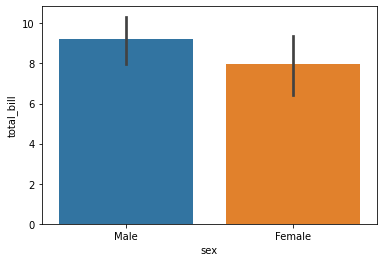

In [3]:
import numpy as np
# Create a bar plot visualizing another metric
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std) # Plot the standard deviation of the total bill for each sex

### Countplots

Countplots count the number of occurrences of each value for a categorical variable. 

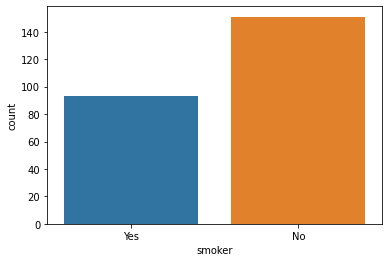

In [4]:
# Create a count plot for a categorical variable
sns.countplot(x='smoker',data=tips) # Count the number of smokers and non-smokers

### Boxplots

Boxplots visualize the distribution of quantitative data across categorical variables. 

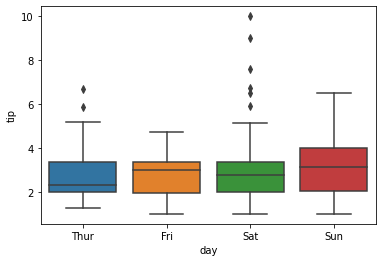

In [6]:
# Create a box plot
sns.boxplot(x='day',y='tip',data=tips) # Get the distribution of tips for each day of the week

#### "Multilevel" boxplots

Add a `hue` parameter to separate the data by another categorical variable.

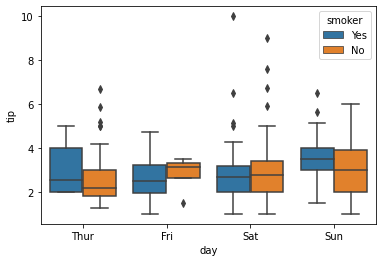

In [7]:
# Create a box plot
sns.boxplot(x='day',y='tip',data=tips, hue='smoker') # Get the distribution of tips for smokers and non-smokers for every day of the week

### Violin Plots

Violin plots show the kernel density estimation of the underlying distributions. 

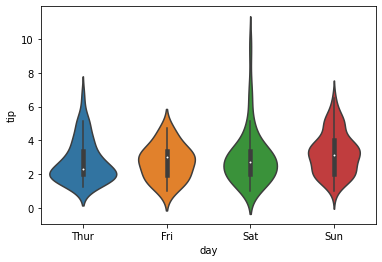

In [9]:
# Create a violin plot
sns.violinplot(x='day',y='tip',data=tips) # Get the distribution of tips for every day of the week

#### "Multilevel" violin plots

Add a `hue` parameter to separate the data by another categorical variable. You can also add `split` to visualize them on the same violin. 

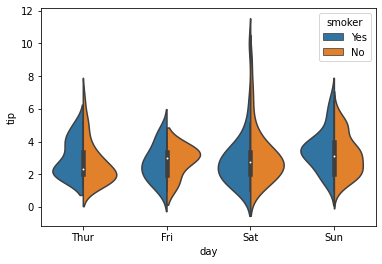

In [10]:
# Create a violin plot
sns.violinplot(x='day',y='tip',data=tips,hue='smoker',split=True) # Get the distribution of tips for smokers and non-smokers for every day of the week

### Strip Plots

Strip plots allow you to visualize scattered data points on a categorical variable. 

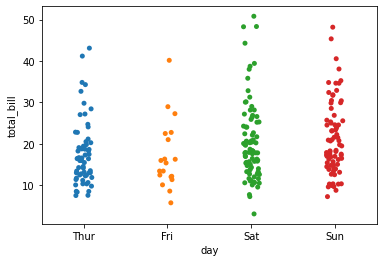

In [11]:
# Create a strip plot to show scattered data on a categorical x axis
sns.stripplot(x='day',y='total_bill',data=tips) # Plot the totall bill data for each day

#### "Multilevel" strip plots

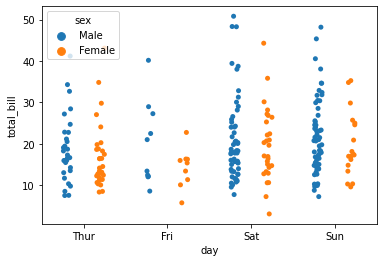

In [14]:
# Create a strip plot to show scattered data on a categorical x axis
sns.stripplot(x='day',y='total_bill',data=tips,hue='sex',dodge=True) # Plot the totall bill data for males and females for each day

### Swarm Plot

Combine violin plots and strip plots. Don't scale well with large datasets.

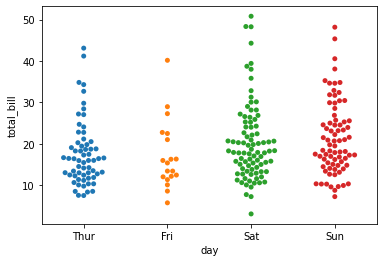

In [15]:
# Create a swarm plot
sns.swarmplot(x='day',y='total_bill',data=tips) # Show the total bill data per day

#### "Multilevel" swarm plots

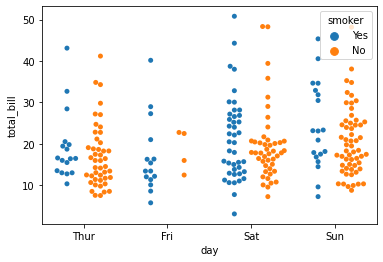

In [18]:
# Create a swarm plot
sns.swarmplot(x='day',y='total_bill',data=tips,hue='smoker',dodge=True) # Show the total bill data per day for smokers/non-smokers

#### Combining swarm plots and violin plots

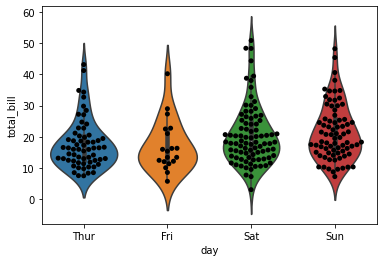

In [20]:
# Create a violin plot
sns.violinplot(x='day',y='total_bill',data=tips)
# Stack a swarm plot on top
sns.swarmplot(x='day',y='total_bill',data=tips,color='black') 

### Cat Plots

Cat plot is the most generic form of plots. You just specify the `kind` for which plot you want

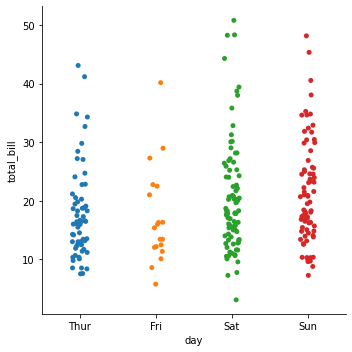

In [27]:
# default - strip
sns.catplot(x='day',y='total_bill',data=tips)

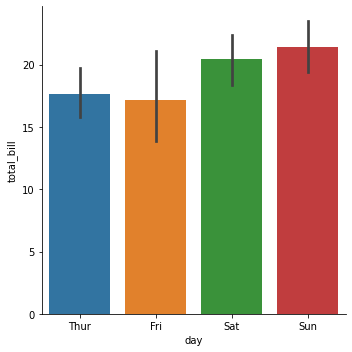

In [26]:
# bar plot
sns.catplot(x='day',y='total_bill',data=tips,kind='bar')

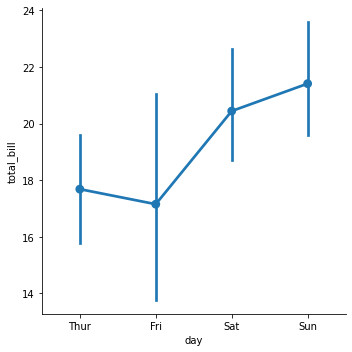

In [28]:
# Point plot
sns.catplot(x='day',y='total_bill',data=tips,kind='point')

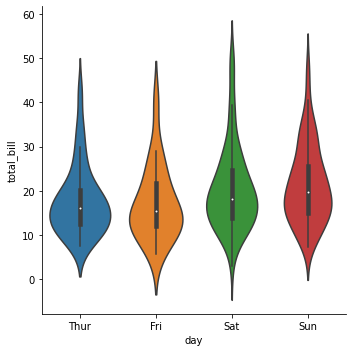

In [29]:
# Violin plot
sns.catplot(x='day',y='total_bill',data=tips,kind='violin')

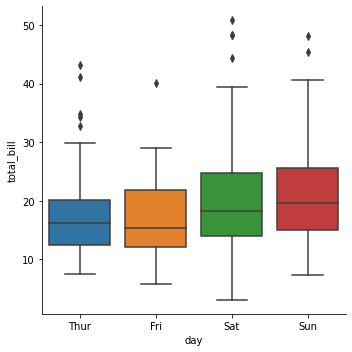

In [30]:
# Box Plot
sns.catplot(x='day',y='total_bill',data=tips,kind='box')

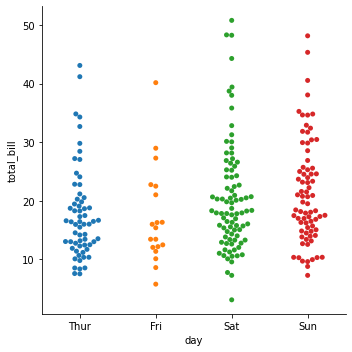

In [31]:
# swarm plot
sns.catplot(x='day',y='total_bill',data=tips,kind='swarm')